In [45]:
%matplotlib inline

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

sns.set(style='white', context='notebook', palette='deep')

# Gun control Survey

The dataset contain answers of survey questions on gun control of the people of different age ranges and regions.

In [46]:
train = pd.read_csv("gun_control.csv")
train.head(10)

,gender,age,region,political_affiliation,should_background_checks_on_gun_buyers_be_more_extensive,should_there_be_more_restrictions_on_who_can_buy_a_gun,will_further_gun_control_reduce_the_possibilities_of_mass_shootings,should_civilians_be_allowed_to_own_guns
0,Female,17 or younger,"East North Central (Illinois, Indiana, Michiga...",Libertarian Party,No,No,Yes,Yes
1,Female,17 or younger,"East South Central (Alabama, Kentucky, Mississ...",Green Party,Yes,Yes,Yes,Yes
2,Female,17 or younger,"East South Central (Alabama, Kentucky, Mississ...",Democratic Party,Yes,Yes,Yes,Yes
3,Female,17 or younger,"West North Central (Iowa, Kansas, Minnesota, M...",Green Party,Yes,Yes,Yes,No
4,Female,17 or younger,"West North Central (Iowa, Kansas, Minnesota, M...",Republican Party,Yes,Yes,Yes,No
5,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
6,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
7,Female,18 to 24 years,"East North Central (Illinois, Indiana, Michiga...",Democratic Party,Yes,Yes,Yes,Yes
8,Female,18 to 24 years,"East South Central (Alabama, Kentucky, Mississ...",Democratic Party,Yes,Yes,Yes,Yes
9,Female,18 to 24 years,"Mid-Atlantic (New Jersey, New York, and Pennsy...",Democratic Party,Yes,Yes,Yes,No


 Data columns (total 8 columns):
    * gender                                                                 560 non-null object
    * age                                                                    560 non-null object
    * region                                                                 560 non-null object
    * political_affiliation                                                  560 non-null object
    * should_background_checks_on_gun_buyers_be_more_extensive               560 non-null object
    * should_there_be_more_restrictions_on_who_can_buy_a_gun                 560 non-null object
    * will_further_gun_control_reduce_the_possibilities_of_mass_shootings    560 non-null object
    * should_civilians_be_allowed_to_own_guns  

In [47]:

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 8 columns):
gender                                                                 560 non-null object
age                                                                    560 non-null object
region                                                                 560 non-null object
political_affiliation                                                  560 non-null object
should_background_checks_on_gun_buyers_be_more_extensive               560 non-null object
should_there_be_more_restrictions_on_who_can_buy_a_gun                 560 non-null object
will_further_gun_control_reduce_the_possibilities_of_mass_shootings    560 non-null object
should_civilians_be_allowed_to_own_guns                                560 non-null object
dtypes: object(8)
memory usage: 35.1+ KB
None


# Gender

Out of total 560 entries 272 are females and 288 are males.

Female: 272 (48.6 percent), Male: 288 (51.4 percent), Total: 560
    * Male     : 288
    * Female   : 272

Female: 272 (48.6 percent), Male: 288 (51.4 percent), Total: 560


Male      288
Female    272
Name: gender, dtype: int64

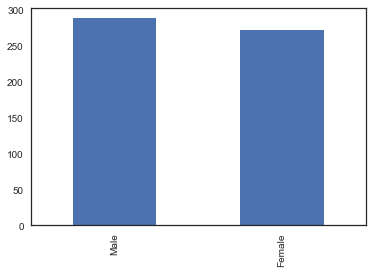

In [48]:
female = train[train['gender']=='Female']
male = train[train['gender']=='Male']

female_col = "blue"
male_col = "red"

print("Female: %i (%.1f percent), Male: %i (%.1f percent), Total: %i"\
      %(len(female), 1.*len(female)/len(train)*100.0,\
        len(male), 1.*len(male)/len(train)*100.0, len(train)))



a = train['gender'].value_counts()
a.plot(kind='bar')
a

# Age

The survey was conducted upon 7 age groups, their counts is given below :

    * 25 to 34 years       179
    * 35 to 44 years       138
    * 18 to 24 years        85
    * 45 to 54 years        78
    * 55 to 64 years        45
    * 65 years and over     19
    * 17 or younger         16


25 to 34 years       179
35 to 44 years       138
18 to 24 years        85
45 to 54 years        78
55 to 64 years        45
65 years and over     19
17 or younger         16
Name: age, dtype: int64

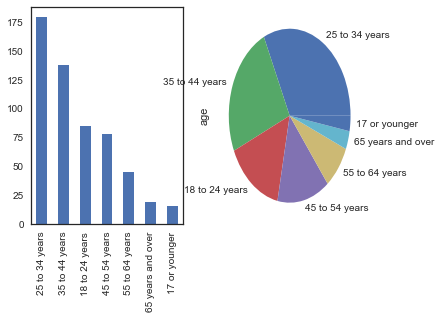

In [49]:
a = train['age'].value_counts()

plt.subplot(121)
a.plot(kind='bar')

plt.subplot(122)
a.plot(kind='pie')
a

# Political Affiliation

Political supporter counts :

    * Democratic Party      288
    * Republican Party      182
    * Libertarian Party      51
    * Green Party            25
    * Constitution Party     14

Democratic Party      288
Republican Party      182
Libertarian Party      51
Green Party            25
Constitution Party     14
Name: political_affiliation, dtype: int64

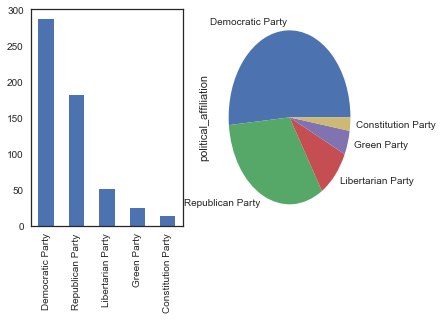

In [50]:
a = train['political_affiliation'].value_counts()

plt.subplot(121)
a.plot(kind='bar')

plt.subplot(122)
a.plot(kind='pie')
a

# Political Affiliation with gender

The number of females based on political affiliation :
    * Democratic Party      152
    * Republican Party      75
    * Libertarian Party     24
    * Green Party           13
    * Constitution Party    8
    
The number of males based on political affiliation :

    * Democratic Party     136
    * Republican Party     107
    * Libertarian Party    27
    * Green Party          12
    * Constitution Party   6

Democratic Party      152
Republican Party       75
Libertarian Party      24
Green Party            13
Constitution Party      8
Name: political_affiliation, dtype: int64
Democratic Party      136
Republican Party      107
Libertarian Party      27
Green Party            12
Constitution Party      6
Name: political_affiliation, dtype: int64


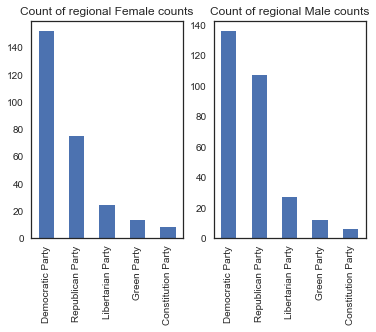

In [51]:
plt.subplot(121)
regionFemale = train['political_affiliation'][train.gender=='Female'].value_counts()
regionFemale.plot(kind='bar')
plt.title('Count of regional Female counts')

print(regionFemale)

plt.subplot(122)
regionMale = train['political_affiliation'][train.gender=='Male'].value_counts()
regionMale.plot(kind='bar')
plt.title('Count of regional Male counts')
print(regionMale)

# Survey Quesions

In [52]:

a = len(train[train['should_background_checks_on_gun_buyers_be_more_extensive\xa0']=='Yes'])/len(train)*100
b = len(train[train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'])/len(train)*100
c = len(train[train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'])/len(train)*100
a
b

86.07142857142858

In [53]:
list(train.columns.values)

['gender',
 'age',
 'region',
 'political_affiliation',
 'should_background_checks_on_gun_buyers_be_more_extensive\xa0',
 'should_there_be_more_restrictions_on_who_can_buy_a_gun',
 'will_further_gun_control_reduce_the_possibilities_of_mass_shootings',
 'should_civilians_be_allowed_to_own_guns\xa0']

# 


Text(0.5,1,'Count of regional Male counts')

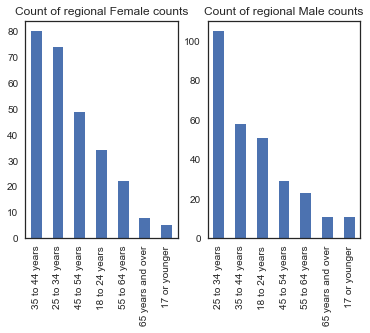

In [54]:
plt.subplot(121)
regionFemale = train['age'][train.gender=='Female'].value_counts()
regionFemale.plot(kind='bar')
plt.title('Count of regional Female counts')
plt.subplot(122)
regionMale = train['age'][train.gender=='Male'].value_counts()
regionMale.plot(kind='bar')
plt.title('Count of regional Male counts')

# Political Affiliation


## What percentage of people from different political Affiliation think that background checks on gun buyers should be more extensive?


The numbers of people based on the political affiliation out of 100 who this that background checks on gun buyers should be more extensive are:

    * Democratic Party      92
    * Republican Party      85
    * Libertarian Party     76
    * Green Party           84
    * Constitution Party    85

Democratic Party      92
Republican Party      85
Libertarian Party     76
Green Party           84
Constitution Party    85
Name: political_affiliation, dtype: int64

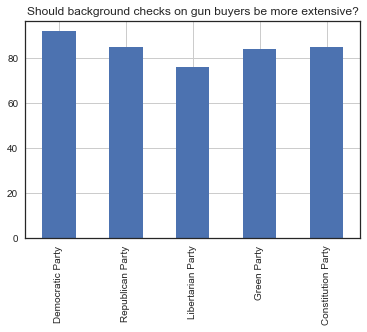

In [55]:

columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['should_background_checks_on_gun_buyers_be_more_extensive\xa0']=='Yes'].value_counts()


for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar',grid = True)
plt.title('Should background checks on gun buyers be more extensive?')

a

# Political Affiliation


## What percentage of people from different political Affiliation think that there should be more restrictions on who can buy a gun?


The numbers of people based on the political affiliation out of 100 who this that background checks on gun buyers who think there should be more restrictions on who can buy a gun:

    * Democratic Party      92
    * Republican Party      79
    * Libertarian Party     74
    * Green Party           96
    * Constitution Party    64

Democratic Party      92
Republican Party      79
Libertarian Party     74
Green Party           96
Constitution Party    64
Name: political_affiliation, dtype: int64

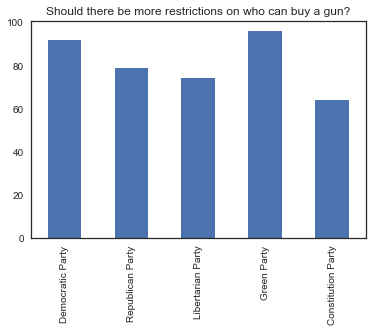

In [56]:
columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar')
plt.title('Should there be more restrictions on who can buy a gun?')
a

# Political Affiliation


## What percentage of people from different political Affiliation think that there further gun control reduce the possibilities of mass shootings?


The numbers of people based on the political affiliation out of 100 who this that further gun control reduce the possibilities of mass shootings:

    * Democratic Party      72
    * Republican Party      49
    * Libertarian Party     45
    * Green Party           64
    * Constitution Party    57

Democratic Party      72
Republican Party      49
Libertarian Party     45
Green Party           64
Constitution Party    57
Name: political_affiliation, dtype: int64

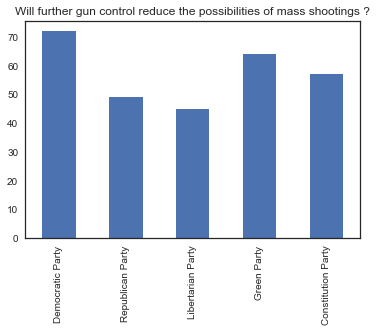

In [57]:
columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar')
plt.title('Will further gun control reduce the possibilities of mass shootings ?')
a

# Political Affiliation


## What percentage of people from different political Affiliation think that civilians should be allowed to own guns?


The numbers of people based on the political affiliation out of 100 who this that civilians should be allowed to own guns:

    * Democratic Party      73
    * Republican Party      84
    * Libertarian Party     82
    * Green Party           80
    * Constitution Party    92

Democratic Party      73
Republican Party      84
Libertarian Party     82
Green Party           80
Constitution Party    92
Name: political_affiliation, dtype: int64

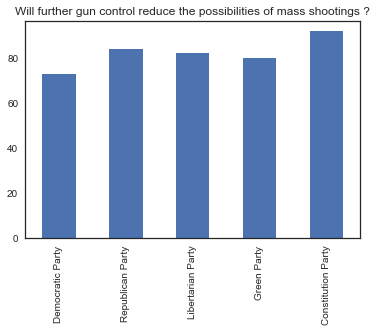

In [58]:
columns = ['Democratic Party','Republican Party','Libertarian Party','Green Party','Constitution Party']

a = train['political_affiliation'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['political_affiliation'] == key ])

a.plot(kind='bar')
plt.title('Will further gun control reduce the possibilities of mass shootings ?')
a

# Gender

## 1. What percentage of people from different gender think that background checks on gun buyers should be more extensive?

Male      81
Female    75

## 2. What percentage of people from different gender think that there should be more restrictions on who can buy a gun?

Female    90
Male      81



## 3. What percentage of people from different gender think that there further gun control reduce the possibilities of mass shootings?

Female    64
Male      59


## 4. What percentage of people from different gender think that civilians should be allowed to own guns?

Male      81
Female    75

Male      81
Female    75
Name: gender, dtype: int64
Female    90
Male      81
Name: gender, dtype: int64
Female    64
Male      59
Name: gender, dtype: int64
Male      81
Female    75
Name: gender, dtype: int64


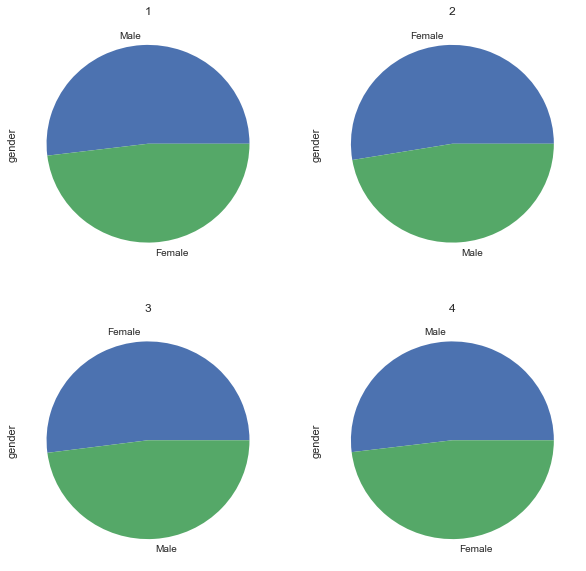

In [59]:


columns = ['Female','Male']

a = train['gender'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

plt.subplot(221)
a.plot(kind='pie',figsize=(10, 10))
plt.title('1')
print(a)


columns = ['Female','Male']

a = train['gender'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

plt.subplot(222)
a.plot(kind='pie')
plt.title('2')
print(a)


columns = ['Female','Male']

a = train['gender'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

plt.subplot(223)
a.plot(kind='pie')
plt.title('3')
print(a)



columns = ['Female','Male']

a = train['gender'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['gender'] == key ])

    
plt.subplot(224)
a.plot(kind='pie')
plt.title('4')
print(a)

# Age Range

## 1. What percentage of people from different age range think that background checks on gun buyers should be more extensive?

* 25 to 34 years       74
* 35 to 44 years       82
* 45 to 54 years       87
* 18 to 24 years       68
* 55 to 64 years       86
* 65 years and over    78
* 17 or younger        68



## 2. What percentage of people from different age range think that there should be more restrictions on who can buy a gun?

* 25 to 34 years       86
* 35 to 44 years       84
* 18 to 24 years       89
* 45 to 54 years       88
* 55 to 64 years       82
* 65 years and over    94
* 17 or younger        75


## 3. What percentage of people from different age range think that there further gun control reduce the possibilities of mass shootings?

* 25 to 34 years       68
* 35 to 44 years       57
* 18 to 24 years       71
* 45 to 54 years       52
* 55 to 64 years       44
* 17 or younger        75
* 65 years and over    52




## 4. What percentage of people from different age range think that civilians should be allowed to own guns?

* 25 to 34 years       74
* 35 to 44 years       82
* 45 to 54 years       87
* 18 to 24 years       68
* 55 to 64 years       86
* 65 years and over    78
* 17 or younger        68

25 to 34 years       74
35 to 44 years       82
45 to 54 years       87
18 to 24 years       68
55 to 64 years       86
65 years and over    78
17 or younger        68
Name: age, dtype: int64
25 to 34 years       86
35 to 44 years       84
18 to 24 years       89
45 to 54 years       88
55 to 64 years       82
65 years and over    94
17 or younger        75
Name: age, dtype: int64
25 to 34 years       68
35 to 44 years       57
18 to 24 years       71
45 to 54 years       52
55 to 64 years       44
17 or younger        75
65 years and over    52
Name: age, dtype: int64
25 to 34 years       74
35 to 44 years       82
45 to 54 years       87
18 to 24 years       68
55 to 64 years       86
65 years and over    78
17 or younger        68
Name: age, dtype: int64


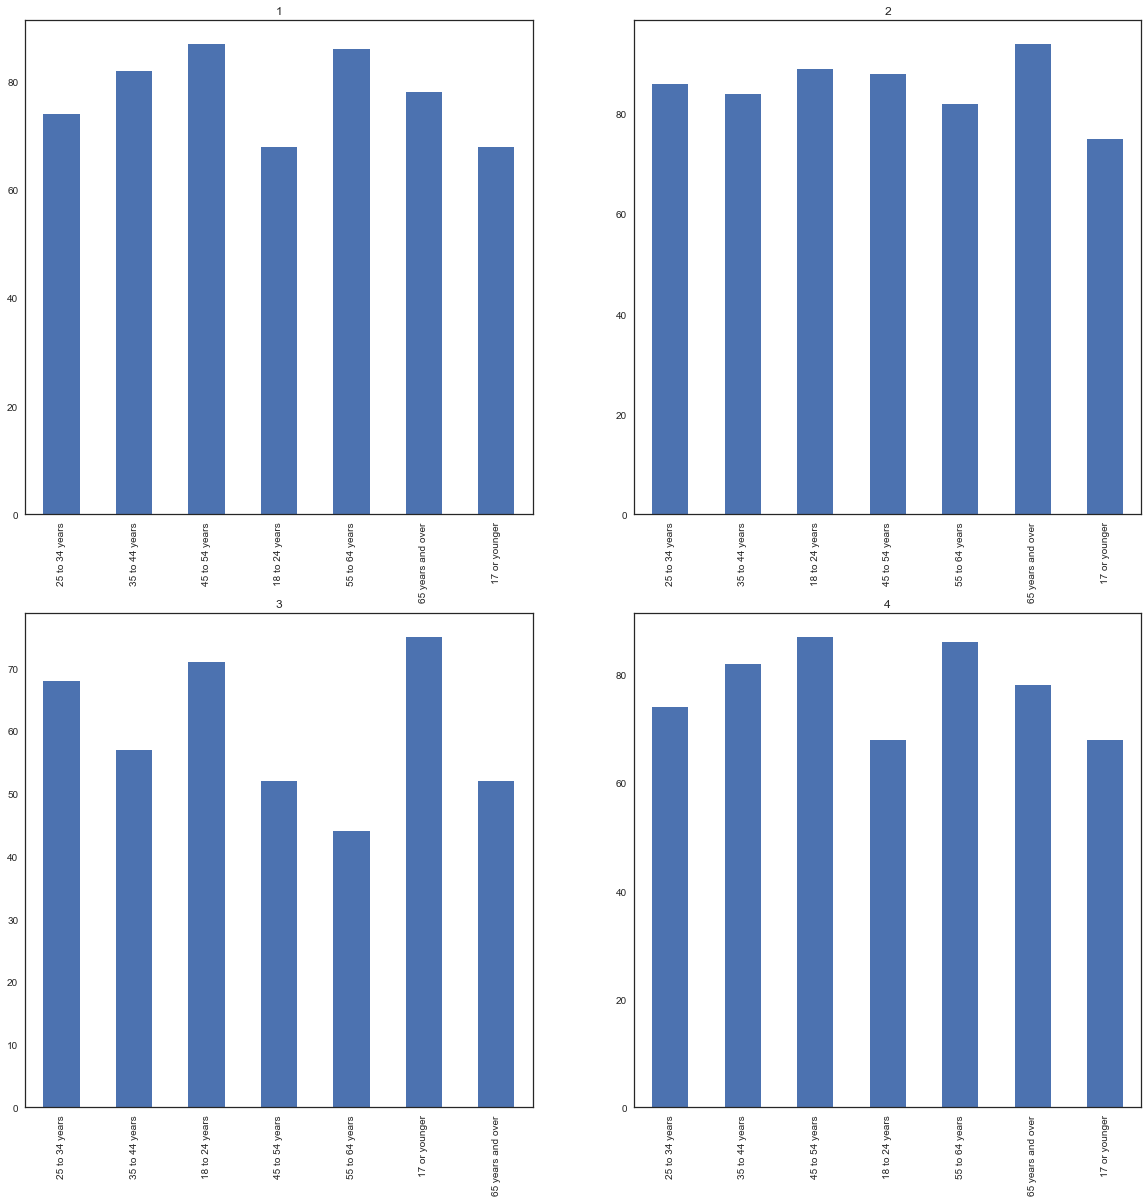

In [60]:
columns = ['25 to 34 years','35 to 44 years','18 to 24 years','45 to 54 years','55 to 64 years','65 years and over','17 or younger']

a = train['age'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

plt.subplot(221)
a.plot(kind='bar',figsize=(20,20))
plt.title('1')
print(a)


a = train['age'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

plt.subplot(222)
a.plot(kind='bar')
plt.title('2')
print(a)


a = train['age'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

plt.subplot(223)
a.plot(kind='bar')
plt.title('3')
print(a)



a = train['age'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in columns:
    a[key] = a[key]*100/len(train[train['age'] == key ])

    
plt.subplot(224)
a.plot(kind='bar')
plt.title('4')
print(a)

In [65]:
cols = ['South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)', 
        'East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)',                                                                       
        'Mid-Atlantic (New Jersey, New York, and Pennsylvania)',                                                                                        
        'Pacific (Alaska, California, Hawaii, Oregon, and Washington)',                                                                                 
        'West South Central (Arkansas, Louisiana, Oklahoma, and Texas)',                                                                                
'East South Central (Alabama, Kentucky, Mississippi, and Tennessee)',                                                                           
'West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)',                                             
'Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)',                                                         
'New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)' ]

# Region

## 1. What percentage of people from different region range think that background checks on gun buyers should be more extensive?

    South Atlantic  84
    East North Central   81
    West South Central   83
    Pacific  70
    Mid-Atlantic 64
    East South Central 87
    West North Central 77
    Mountain 76
    New England 68





## 2. What percentage of people from different region range think that there should be more restrictions on who can buy a gun?

    South Atlantic 84
    East North Central 86
    Mid-Atlantic 88
    Pacific 91
    West South Central 80
    East South Central 87
    New England 96
    West North Central 81
    Mountain 80



## 3. What percentage of people from different region range think that there further gun control reduce the possibilities of mass shootings?


    South Atlantic 56
    Mid-Atlantic 67
    East North Central 63
    Pacific 69
    West South Central 63
    East South Central 55
    New England 72
    Mountain 57
    West North Central 51






## 4. What percentage of people from different region range think that civilians should be allowed to own guns?

    South Atlantic 84
    East North 81
    West South Central 83
    Pacific 70
    Mid-Atlantic 64
    East South 87
    West North Central 77
Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)                                                         76
New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)                                                   68
Name: region, dtype: int64

South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, District of Columbia, and West Virginia)    84
East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)                                                                       81
West South Central (Arkansas, Louisiana, Oklahoma, and Texas)                                                                               83
Pacific (Alaska, California, Hawaii, Oregon, and Washington)                                                                                70
Mid-Atlantic (New Jersey, New York, and Pennsylvania)                                                                                       64
East South Central (Alabama, Kentucky, Mississippi, and Tennessee)                                                                          87
West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)                                            77

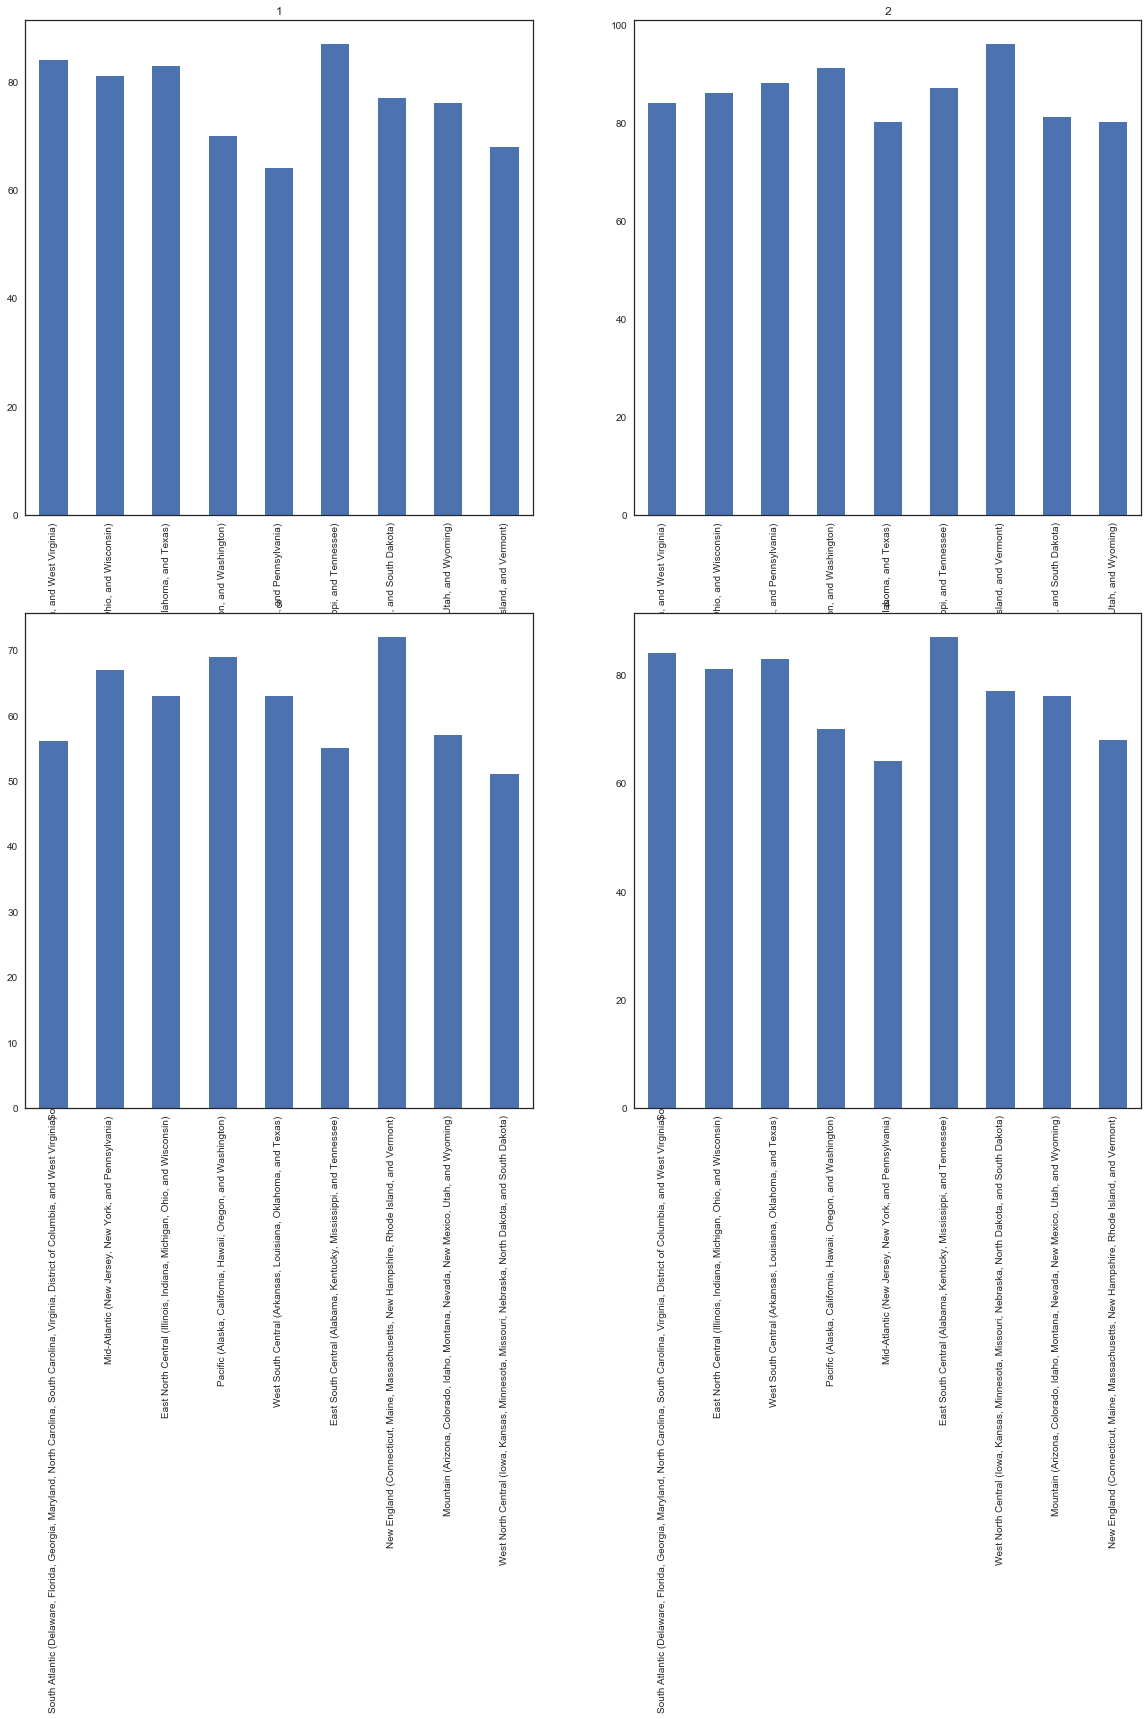

In [67]:

a = train['region'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in cols:
    a[key] = a[key]*100/len(train[train['region'] == key ])

plt.subplot(221)
a.plot(kind='bar',figsize=(20,20))
plt.title('1')
print(a)


a = train['region'][train['should_there_be_more_restrictions_on_who_can_buy_a_gun']=='Yes'].value_counts()



for key in cols:
    a[key] = a[key]*100/len(train[train['region'] == key ])

plt.subplot(222)
a.plot(kind='bar')
plt.title('2')
print(a)


a = train['region'][train['will_further_gun_control_reduce_the_possibilities_of_mass_shootings']=='Yes'].value_counts()



for key in cols:
    a[key] = a[key]*100/len(train[train['region'] == key ])

plt.subplot(223)
a.plot(kind='bar')
plt.title('3')
print(a)



a = train['region'][train['should_civilians_be_allowed_to_own_guns\xa0']=='Yes'].value_counts()



for key in cols:
    a[key] = a[key]*100/len(train[train['region'] == key ])

    
plt.subplot(224)
a.plot(kind='')
plt.title('4')
print(a)

# Political Affilition vs Age for Female

Female (25 to 34 years) : 
* Democratic Party      38
* Republican Party      24
* Libertarian Party      7
* Green Party            4
* Constitution Party     1

Female (35 to 44 years) : 
* Democratic Party      43
* Republican Party      25
* Libertarian Party      8
* Constitution Party     2
* Green Party            2

Female (18 to 24 years) : 
* Democratic Party      26
* Libertarian Party      3
* Constitution Party     2
* Republican Party       2
* Green Party            1

Female (45 to 54 years) : 
* Democratic Party      26
* Republican Party      13
* Libertarian Party      5
* Green Party            3
* Constitution Party     2

Female (55 to 64 years) : 
* Democratic Party      14
* Republican Party       6
* Constitution Party     1
* Green Party            1

Female (65 years and over) : 
* Republican Party    4
* Democratic Party    4

Female (17 or younger) : 
* Green Party          2
* Republican Party     1
* Democratic Party     1
* Libertarian Party    1


Female (25 to 34 years) : 
Democratic Party      38
Republican Party      24
Libertarian Party      7
Green Party            4
Constitution Party     1
Name: political_affiliation, dtype: int64
Female (35 to 44 years) : 
Democratic Party      43
Republican Party      25
Libertarian Party      8
Constitution Party     2
Green Party            2
Name: political_affiliation, dtype: int64
Female (18 to 24 years) : 
Democratic Party      26
Libertarian Party      3
Constitution Party     2
Republican Party       2
Green Party            1
Name: political_affiliation, dtype: int64
Female (45 to 54 years) : 
Democratic Party      26
Republican Party      13
Libertarian Party      5
Green Party            3
Constitution Party     2
Name: political_affiliation, dtype: int64
Female (55 to 64 years) : 
Democratic Party      14
Republican Party       6
Constitution Party     1
Green Party            1
Name: political_affiliation, dtype: int64
Female (65 years and over) : 
Republican Party    4
Dem

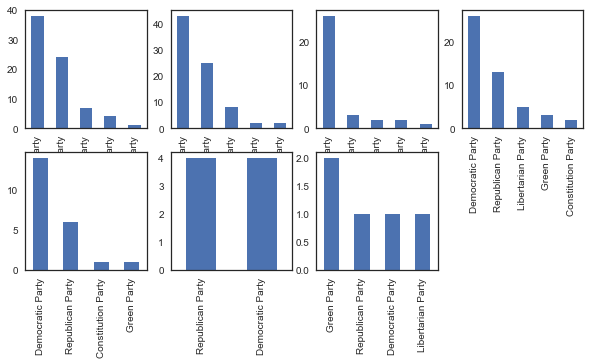

In [61]:


cols = ['25 to 34 years','35 to 44 years','18 to 24 years','45 to 54 years','55 to 64 years','65 years and over','17 or younger']

f = []
i = 1
for key in cols:
    regionFemale = train[(train.gender=='Female') & (train.age==key)]
    regionFemale = regionFemale['political_affiliation'].value_counts()
    plt.subplot(4,4,i)
    regionFemale.plot(kind='bar',figsize=(10,10))
    
    i += 1
    f.append(regionFemale)
    print('Female ('+key+') : ')
    print(regionFemale)




# Political Affilition vs Age for Male

Male (25 to 34 years) : 
* Democratic Party      57
* Republican Party      30
* Libertarian Party      9
* Green Party            6
* Constitution Party     3

Male (35 to 44 years) : 
* Democratic Party      26
* Republican Party      21
* Libertarian Party      9
* Constitution Party     1
* Green Party            1

Male (18 to 24 years) : 
* Republican Party     23
* Democratic Party     22
* Libertarian Party     5
* Green Party           1

Male (45 to 54 years) : 
* Republican Party      13
* Democratic Party      10
* Green Party            4
* Constitution Party     1
* Libertarian Party      1

Male (55 to 64 years) : 
* Republican Party     11
* Democratic Party      9
* Libertarian Party     3

Male (65 years and over) : 
* Democratic Party    6
* Republican Party    5

Male (17 or younger) : 
* Democratic Party      6
* Republican Party      4
* Constitution Party    1


Male (25 to 34 years) : 
Democratic Party      57
Republican Party      30
Libertarian Party      9
Green Party            6
Constitution Party     3
Name: political_affiliation, dtype: int64
Male (35 to 44 years) : 
Democratic Party      26
Republican Party      21
Libertarian Party      9
Constitution Party     1
Green Party            1
Name: political_affiliation, dtype: int64
Male (18 to 24 years) : 
Republican Party     23
Democratic Party     22
Libertarian Party     5
Green Party           1
Name: political_affiliation, dtype: int64
Male (45 to 54 years) : 
Republican Party      13
Democratic Party      10
Green Party            4
Constitution Party     1
Libertarian Party      1
Name: political_affiliation, dtype: int64
Male (55 to 64 years) : 
Republican Party     11
Democratic Party      9
Libertarian Party     3
Name: political_affiliation, dtype: int64
Male (65 years and over) : 
Democratic Party    6
Republican Party    5
Name: political_affiliation, dtype: int64
Male (17

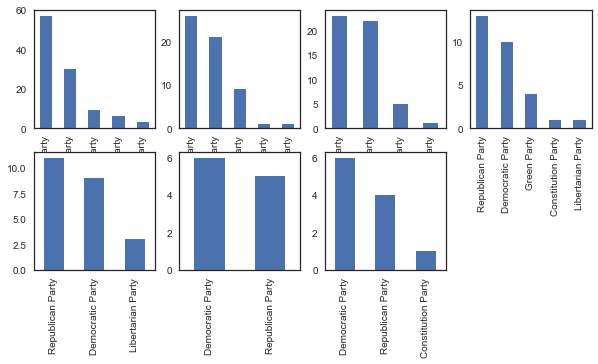

In [62]:


cols = ['25 to 34 years','35 to 44 years','18 to 24 years','45 to 54 years','55 to 64 years','65 years and over','17 or younger']

f = []
i = 1
for key in cols:
    regionFemale = train[(train.gender=='Male') & (train.age==key)]
    regionFemale = regionFemale['political_affiliation'].value_counts()
    plt.subplot(4,4,i)
    regionFemale.plot(kind='bar',figsize=(10,10))
    
    i += 1
    f.append(regionFemale)
    print('Male ('+key+') : ')
    print(regionFemale)


